In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import TSNE

In [2]:
plt.style.use('ggplot')

In [3]:
data=pd.read_csv('combined_data_with_loc.csv')
data.head()

,Community Name,Region,Map reference,Grid reference,Location,Population Density,Travel time to GPO (minutes),Distance to GPO (km),LGA,Primary Care Partnership,...,Travel time to nearest public hospital with emergency department,Distance to nearest public hospital with emergency department,Presentations to emergency departments due to injury,"Presentations to emergency departments due to injury, %",Category 4 & 5 emergency department presentations,"Category 4 & 5 emergency department presentations, %",geo_lat,geo_lon,cart_x,cart_y
0,Ascot Vale,Northern and Western Metropolitan,4,B3,6km NW of Melbourne,3758.623596,9.360142,6.958742,Moonee Valley (C),Inner North West Primary Care Partnership,...,6.630953,4.993841,679.257076,20.502456,1864.918123,56.290032,-37.775606,144.914871,-4.230377,4.251470
1,Braybrook,Northern and Western Metropolitan,4,A3,10km WNW of Melbourne,2025.468296,15.131666,11.595888,Maribyrnong (C),"HealthWest (b): Hobson's Bay, Maribyrnong, Wyn...",...,12.824977,10.161988,543.631989,20.647263,1683.966712,63.957428,-37.779315,144.858155,-9.212552,3.839001
2,Craigieburn,Northern and Western Metropolitan,2,A3,27km N of Melbourne,1034.970870,31.994666,43.100287,Hume (C),Hume-Whittlesea Primary Care Partnership,...,11.570855,15.213189,2044.424399,20.618005,5102.134434,51.454988,-37.570576,144.963028,0.000000,27.049690
3,Croydon,Eastern Metropolitan,2,B4,28km E of Melbourne,1730.064830,28.992647,34.071323,Maroondah (C),Outer East Primary Care Partnership,...,5.093285,3.601752,1754.954941,28.537825,3062.182462,49.795026,-37.813411,145.281013,27.933349,0.047723
4,Fawkner,Northern and Western Metropolitan,4,C1,12km N of Melbourne,2619.120089,17.405267,13.047142,Moreland (C),Inner North West Primary Care Partnership,...,11.510757,12.004044,680.401318,17.909865,1942.874353,51.141315,-37.705724,144.963028,0.000000,12.021947


In [4]:
#load feature category mapping
feature_category_dict=json.load(open('feature_category_dict.json'))
feature_category_dict

{'2007 population': ['2007 ERP age 0-4, persons',
  '2007 ERP age 0-4, %',
  '2007 ERP age 5-9, persons',
  '2007 ERP age 5-9, %',
  '2007 ERP age 10-14, persons',
  '2007 ERP age 10-14, %',
  '2007 ERP age 15-19, persons',
  '2007 ERP age 15-19, %',
  '2007 ERP age 20-24, persons',
  '2007 ERP age 20-24, %',
  '2007 ERP age 25-44, persons',
  '2007 ERP age 25-44, %',
  '2007 ERP age 45-64, persons',
  '2007 ERP age 45-64, %',
  '2007 ERP age 65-69, persons',
  '2007 ERP age 65-69, %',
  '2007 ERP age 70-74, persons',
  '2007 ERP age 70-74, %',
  '2007 ERP age 75-79, persons',
  '2007 ERP age 75-79, %',
  '2007 ERP age 80-84, persons',
  '2007 ERP age 80-84, %',
  '2007 ERP age 85+, persons',
  '2007 ERP age 85+, %',
  '2007 ERP, total'],
 '2007-2012 population change': ['% change, 2007-2012, age 0-4',
  '% change, 2007-2012, age 5-9',
  '% change, 2007-2012, age 10-14',
  '% change, 2007-2012, age 15-19',
  '% change, 2007-2012, age 20-24',
  '% change, 2007-2012, age 25-44',
  '% cha

# Perspective 1: Services Provided

In [5]:
# load the category 'Services'
category='Services'
features=feature_category_dict[category]
features

['Public Hospitals',
 'Private Hospitals',
 'Community Health Centres',
 'Bush Nursing Centres',
 'Allied Health',
 'Alternative Health',
 'Child Protection and Family',
 'Dental',
 'Disability',
 'General Practice',
 'Homelessness',
 'Mental Health',
 'Pharmacies',
 'Aged Care (High Care)',
 'Aged Care (Low Care)',
 'Aged Care (SRS)',
 'Kinder and/or Childcare',
 'Primary Schools',
 'Secondary Schools',
 'P12 Schools',
 'Other Schools',
 'Centrelink Offices',
 'Medicare Offices',
 'Medicare Access Points']

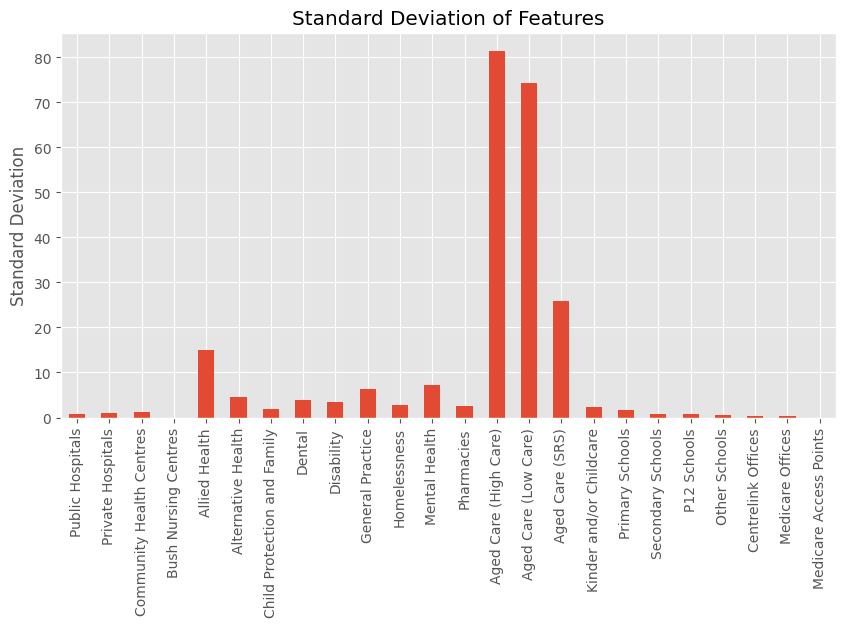

,Public Hospitals,Private Hospitals,Community Health Centres,Bush Nursing Centres,Allied Health,Alternative Health,Child Protection and Family,Dental,Disability,General Practice,...,Aged Care (Low Care),Aged Care (SRS),Kinder and/or Childcare,Primary Schools,Secondary Schools,P12 Schools,Other Schools,Centrelink Offices,Medicare Offices,Medicare Access Points
0,0,1,1,0,10,5,0,0,0,2,...,31,0,4,3,0,0,1,0,0,0
1,0,0,1,0,13,1,0,1,1,4,...,0,0,1,2,2,0,1,0,0,0
2,1,0,1,0,15,0,0,1,1,8,...,0,0,2,6,1,1,0,0,0,0
3,0,1,0,0,30,8,0,7,9,9,...,179,45,10,5,2,0,0,0,0,0
4,0,0,1,0,13,1,0,1,0,5,...,150,0,3,4,1,1,0,0,0,0


In [6]:
# extract the data for the category 'Services'
data_services=data[features]
# plot the standard deviation of the features
plt.figure(figsize=(10,5))
data_services.std().plot(kind='bar')
plt.title('Standard Deviation of Features')
plt.ylabel('Standard Deviation')
plt.show()
data_services.head()

In [7]:
# scale the data between 0 and 1
scaler=MinMaxScaler()
data_services_scaled=scaler.fit_transform(data_services)
data_services_scaled=pd.DataFrame(data_services_scaled,columns=features)
data_services_scaled.head()

,Public Hospitals,Private Hospitals,Community Health Centres,Bush Nursing Centres,Allied Health,Alternative Health,Child Protection and Family,Dental,Disability,General Practice,...,Aged Care (Low Care),Aged Care (SRS),Kinder and/or Childcare,Primary Schools,Secondary Schools,P12 Schools,Other Schools,Centrelink Offices,Medicare Offices,Medicare Access Points
0,0.00,0.25,0.166667,0.0,0.117647,0.3125,0.0,0.000000,0.000000,0.074074,...,0.110714,0.000000,0.4,0.500000,0.000000,0.000000,0.5,0.0,0.0,0.0
1,0.00,0.00,0.166667,0.0,0.152941,0.0625,0.0,0.066667,0.076923,0.148148,...,0.000000,0.000000,0.1,0.333333,0.666667,0.000000,0.5,0.0,0.0,0.0
2,0.25,0.00,0.166667,0.0,0.176471,0.0000,0.0,0.066667,0.076923,0.296296,...,0.000000,0.000000,0.2,1.000000,0.333333,0.333333,0.0,0.0,0.0,0.0
3,0.00,0.25,0.000000,0.0,0.352941,0.5000,0.0,0.466667,0.692308,0.333333,...,0.639286,0.381356,1.0,0.833333,0.666667,0.000000,0.0,0.0,0.0,0.0
4,0.00,0.00,0.166667,0.0,0.152941,0.0625,0.0,0.066667,0.000000,0.185185,...,0.535714,0.000000,0.3,0.666667,0.333333,0.333333,0.0,0.0,0.0,0.0


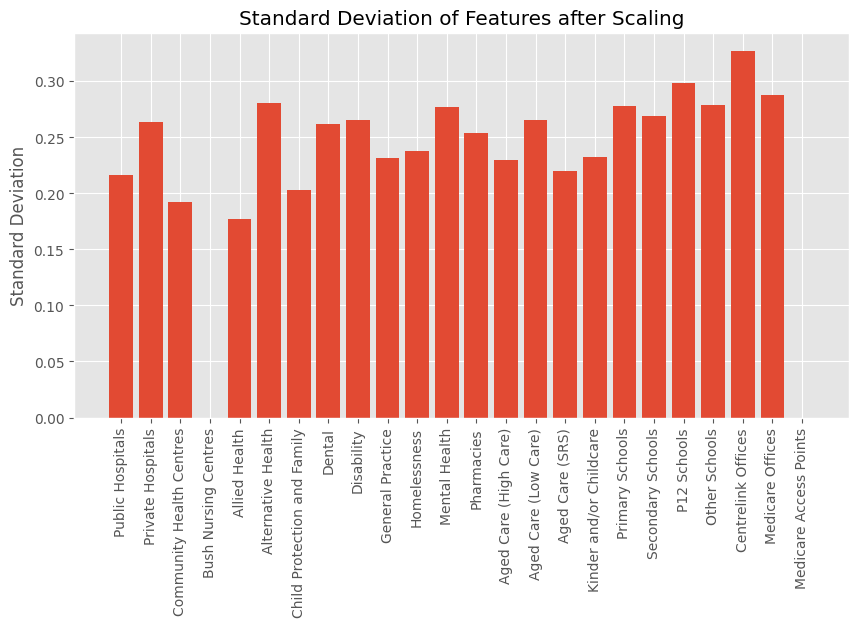

,Public Hospitals,Private Hospitals,Community Health Centres,Bush Nursing Centres,Allied Health,Alternative Health,Child Protection and Family,Dental,Disability,General Practice,...,Aged Care (Low Care),Aged Care (SRS),Kinder and/or Childcare,Primary Schools,Secondary Schools,P12 Schools,Other Schools,Centrelink Offices,Medicare Offices,Medicare Access Points
count,34.000000,34.000000,34.000000,34.0,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,...,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.0
mean,0.066176,0.183824,0.102941,0.0,0.160208,0.237132,0.068627,0.239216,0.233032,0.232026,...,0.248739,0.110419,0.261765,0.387255,0.225490,0.186275,0.205882,0.117647,0.088235,0.0
std,0.215927,0.263347,0.192514,0.0,0.176910,0.280683,0.202887,0.261628,0.265448,0.231442,...,0.265606,0.219691,0.232268,0.277436,0.268687,0.298043,0.278460,0.327035,0.287902,0.0
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.0,0.064706,0.000000,0.000000,0.016667,0.019231,0.074074,...,0.000000,0.000000,0.100000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.000000,0.000000,0.0,0.141176,0.125000,0.000000,0.133333,0.153846,0.185185,...,0.169643,0.000000,0.200000,0.333333,0.166667,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.000000,0.250000,0.166667,0.0,0.197059,0.406250,0.000000,0.400000,0.307692,0.287037,...,0.418750,0.165254,0.400000,0.500000,0.333333,0.333333,0.500000,0.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [8]:
# plot the standard deviation of the features
plt.figure(figsize=(10,5))
plt.bar(data_services_scaled.columns,data_services_scaled.std())
plt.xticks(rotation=90)
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation of Features after Scaling')
plt.show()
data_services_scaled.describe()

In [9]:
data_services_scaled['suburb_services_score']=data_services_scaled.mean(axis=1)
data_services_scaled.head()

,Public Hospitals,Private Hospitals,Community Health Centres,Bush Nursing Centres,Allied Health,Alternative Health,Child Protection and Family,Dental,Disability,General Practice,...,Aged Care (SRS),Kinder and/or Childcare,Primary Schools,Secondary Schools,P12 Schools,Other Schools,Centrelink Offices,Medicare Offices,Medicare Access Points,suburb_services_score
0,0.00,0.25,0.166667,0.0,0.117647,0.3125,0.0,0.000000,0.000000,0.074074,...,0.000000,0.4,0.500000,0.000000,0.000000,0.5,0.0,0.0,0.0,0.124661
1,0.00,0.00,0.166667,0.0,0.152941,0.0625,0.0,0.066667,0.076923,0.148148,...,0.000000,0.1,0.333333,0.666667,0.000000,0.5,0.0,0.0,0.0,0.107885
2,0.25,0.00,0.166667,0.0,0.176471,0.0000,0.0,0.066667,0.076923,0.296296,...,0.000000,0.2,1.000000,0.333333,0.333333,0.0,0.0,0.0,0.0,0.133961
3,0.00,0.25,0.000000,0.0,0.352941,0.5000,0.0,0.466667,0.692308,0.333333,...,0.381356,1.0,0.833333,0.666667,0.000000,0.0,0.0,0.0,0.0,0.318122
4,0.00,0.00,0.166667,0.0,0.152941,0.0625,0.0,0.066667,0.000000,0.185185,...,0.000000,0.3,0.666667,0.333333,0.333333,0.0,0.0,0.0,0.0,0.139885


<Figure size 1000x500 with 0 Axes>

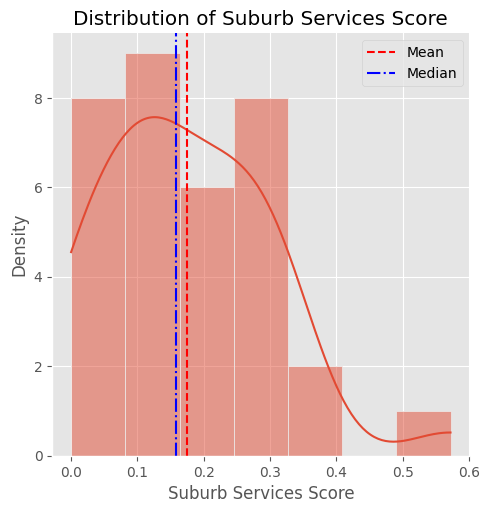

count    34.000000
mean      0.174807
std       0.127465
min       0.000000
25%       0.089691
50%       0.157910
75%       0.258785
max       0.572092
Name: suburb_services_score, dtype: float64

In [10]:
# plot the distribution of the suburb services score
plt.figure(figsize=(10,5))
sns.displot(data_services_scaled['suburb_services_score'],kde=True)
plt.title('Distribution of Suburb Services Score')
plt.xlabel('Suburb Services Score')
plt.ylabel('Density')
# show mean and median
plt.axvline(data_services_scaled['suburb_services_score'].mean(),color='red',label='Mean',linestyle='--')
plt.axvline(data_services_scaled['suburb_services_score'].median(),color='blue',label='Median',linestyle='-.')
plt.legend()
plt.show()
# describe the suburb services score
data_services_scaled['suburb_services_score'].describe()

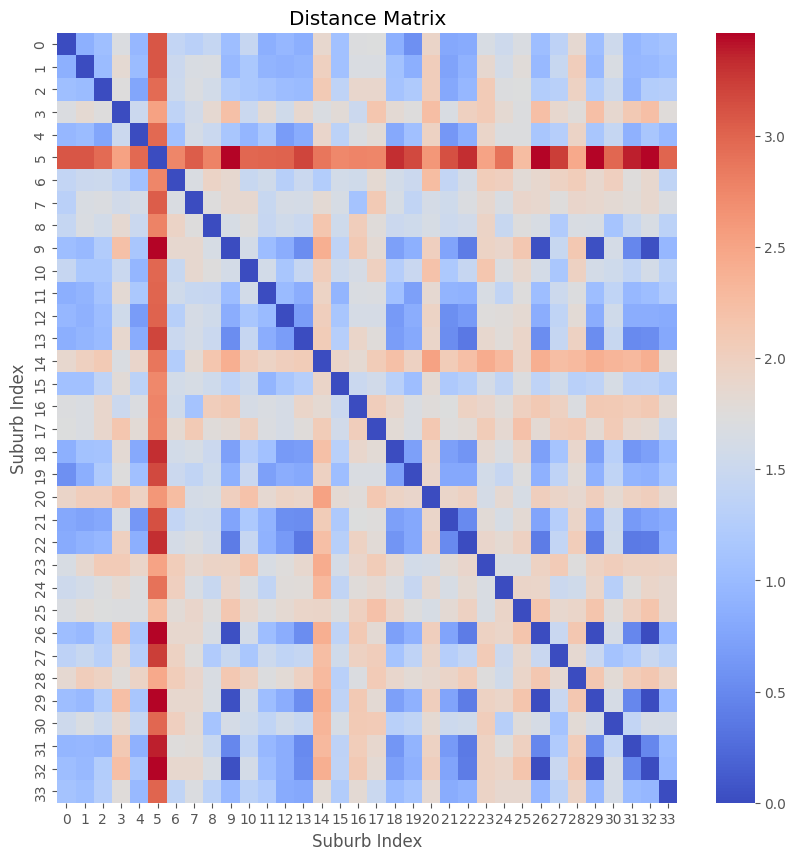

In [11]:
# define distance between two suburbs
# value is (absolute difference between the two suburb services scores)
def similarity_score(suburb1_idx,suburb2_idx):
	return np.linalg.norm(data_services_scaled.iloc[suburb1_idx]-data_services_scaled.iloc[suburb2_idx])

# calculate similarity matrix
distance_services=np.zeros((data_services_scaled.shape[0],data_services_scaled.shape[0]))
for i in range(data_services_scaled.shape[0]):
	for j in range(data_services_scaled.shape[0]):
		distance_services[i,j]=similarity_score(i,j)

# plot the similarity matrix
plt.figure(figsize=(10,10))
sns.heatmap(distance_services,cmap='coolwarm')
plt.title('Distance Matrix')
plt.xlabel('Suburb Index')
plt.ylabel('Suburb Index')
plt.show()

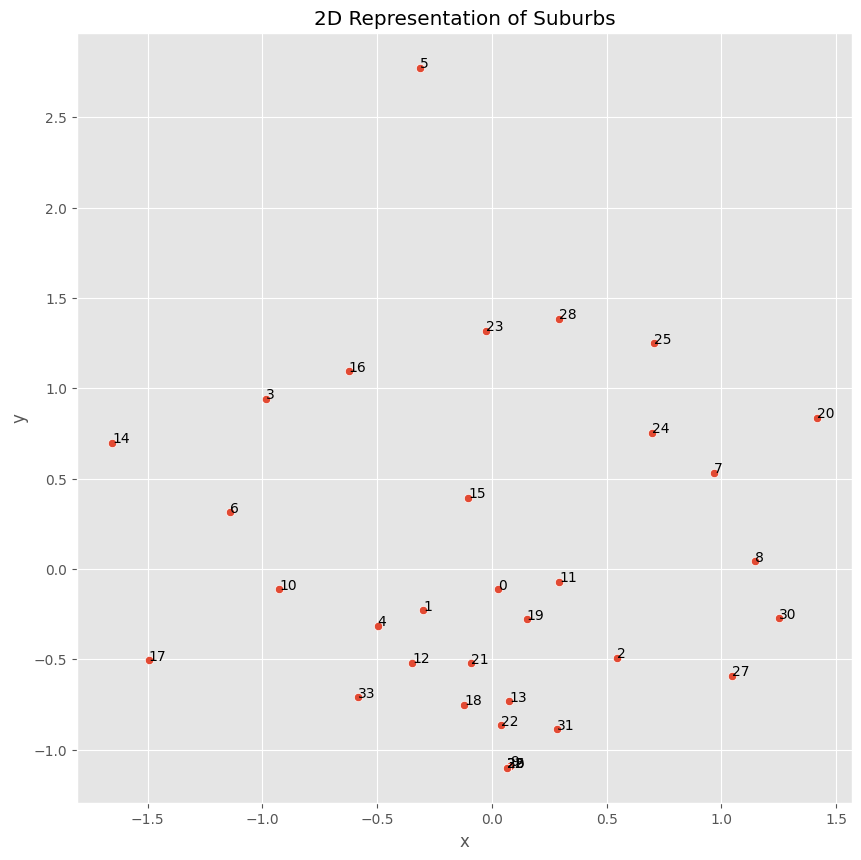

,x,y
0,0.025702,-0.112645
1,-0.300483,-0.226920
2,0.546590,-0.490412
3,-0.985403,0.943312
4,-0.498184,-0.313293


In [12]:
# do an MDS on the similarity matrix to get the 2D representation of the suburbs
mds=MDS(n_components=2,dissimilarity='precomputed',random_state=42)
suburb_2d=mds.fit_transform(distance_services)
suburb_2d=pd.DataFrame(suburb_2d,columns=['x','y'])

# plot the 2D representation of the suburbs
plt.figure(figsize=(10,10))
sns.scatterplot(x='x',y='y',data=suburb_2d)
plt.title('2D Representation of Suburbs')
plt.xlabel('x')
plt.ylabel('y')
# annotate the suburbs with the suburb index
for i in range(suburb_2d.shape[0]):
	plt.text(suburb_2d['x'].iloc[i],suburb_2d['y'].iloc[i],i)
plt.show()
suburb_2d.head()

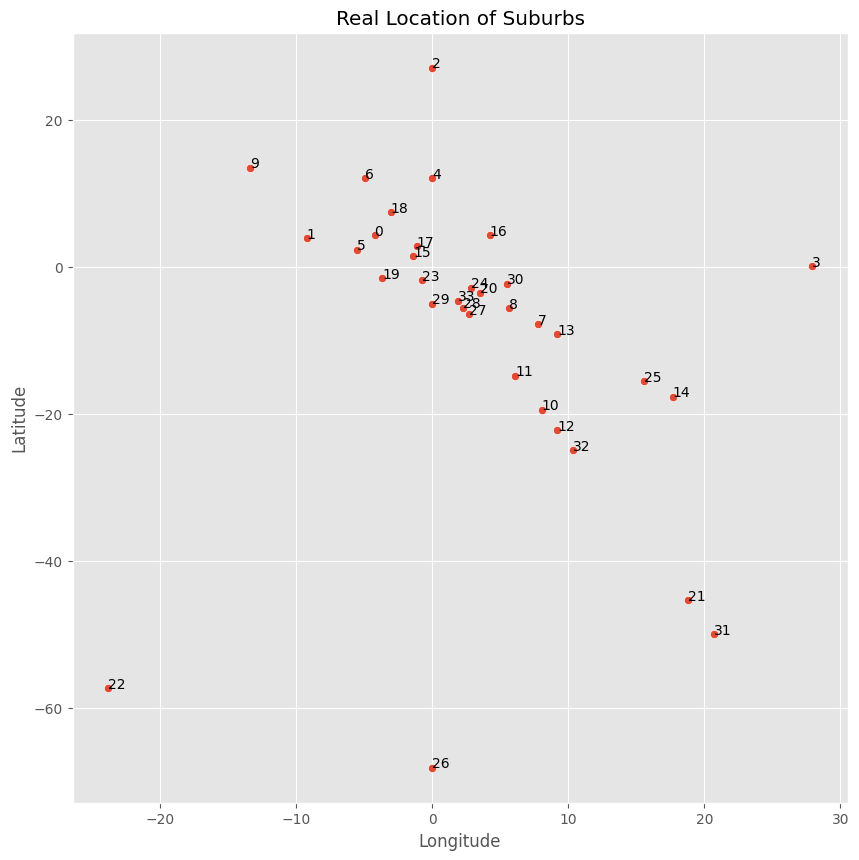

In [13]:
# do a similar plot for the real location of the suburbs
plt.figure(figsize=(10,10))
sns.scatterplot(x='cart_x',y='cart_y',data=data)
plt.title('Real Location of Suburbs')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# annotate the suburbs with the suburb index
for i in range(data.shape[0]):
	plt.text(data['cart_x'].iloc[i],data['cart_y'].iloc[i],i)
plt.show()


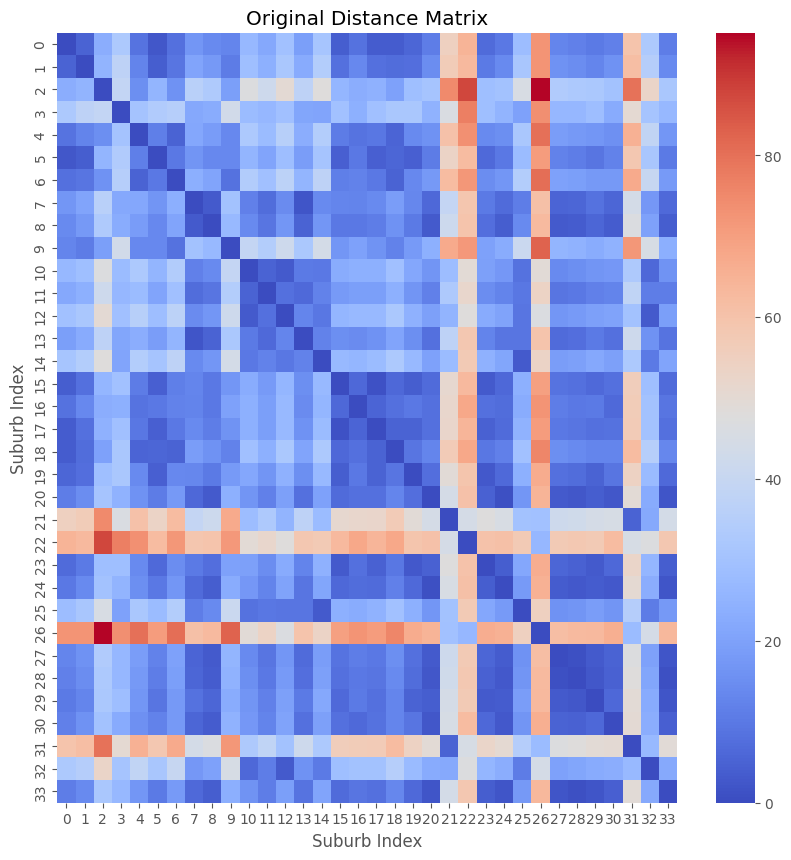

In [14]:
# pairwise distance between the original location
distance_original=np.zeros((data.shape[0],data.shape[0]))
for i in range(data.shape[0]):
	for j in range(data.shape[0]):
		distance_original[i,j]=np.sqrt((data['cart_x'].iloc[i]-data['cart_x'].iloc[j])**2+(data['cart_y'].iloc[i]-data['cart_y'].iloc[j])**2)

# plot the distance matrix
plt.figure(figsize=(10,10))
sns.heatmap(distance_original,cmap='coolwarm')
plt.title('Original Distance Matrix')
plt.xlabel('Suburb Index')
plt.ylabel('Suburb Index')
plt.show()

In [15]:
# compute the correlation matrix for the two 2D representations
from scipy.spatial import procrustes

# Example distance matrices
matrix1 = distance_services
matrix2 = distance_original

# Apply Procrustes analysis
mtx1, mtx2, disparity = procrustes(matrix1, matrix2)
print(f"Procrustes Disparity: {disparity}")


Procrustes Disparity: 0.8497789104137212


# Perspective 2: Land Use (percentage and amount)

In [16]:
feature='Land Use'
data_land=data[feature_category_dict[feature]]
data_land.head()

,Commercial (km^2),Commercial (%),Industrial (km^2),Industrial (%),Residential (km^2),Residential (%),Rural (km^2),Rural (%),Other (km^2),Other (%)
0,0.110250,2.874503,0.005093,0.132784,2.894001,75.454089,0.000000,0.000000,0.826102,21.538624
1,1.013147,23.425767,0.177854,4.112305,2.198204,50.826408,0.000000,0.000000,0.935720,21.635520
2,0.782388,2.215516,1.763098,4.992626,4.486082,12.703395,1.935031,5.479494,26.347439,74.608969
3,0.228507,1.609852,0.407614,2.871681,10.370552,73.061560,0.041521,0.292517,3.146073,22.164391
4,0.123132,2.421885,0.168014,3.304669,3.661186,72.011763,0.000000,0.000000,1.131817,22.261683


In [17]:
# only keep the columns with '%' symbol
data_land_percentage=data_land.loc[:,data_land.columns.str.contains('%')]
data_land_percentage.head()

,Commercial (%),Industrial (%),Residential (%),Rural (%),Other (%)
0,2.874503,0.132784,75.454089,0.000000,21.538624
1,23.425767,4.112305,50.826408,0.000000,21.635520
2,2.215516,4.992626,12.703395,5.479494,74.608969
3,1.609852,2.871681,73.061560,0.292517,22.164391
4,2.421885,3.304669,72.011763,0.000000,22.261683


In [18]:
# convert percentage to float
data_land_frac=data_land_percentage/100
for col in data_land_frac.columns:
	data_land_frac[col]=data_land_frac[col].astype(float)
	# change the column name
	data_land_frac.rename(columns={col:col.replace('%','frac')},inplace=True)

# print the sum across all columns
print(data_land_frac.sum(axis=1))
data_land_frac.head()

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    1.0
29    1.0
30    1.0
31    1.0
32    1.0
33    1.0
dtype: float64


,Commercial (frac),Industrial (frac),Residential (frac),Rural (frac),Other (frac)
0,0.028745,0.001328,0.754541,0.000000,0.215386
1,0.234258,0.041123,0.508264,0.000000,0.216355
2,0.022155,0.049926,0.127034,0.054795,0.746090
3,0.016099,0.028717,0.730616,0.002925,0.221644
4,0.024219,0.033047,0.720118,0.000000,0.222617


In [19]:
import numpy as np
import pandas as pd

# # Example DataFrame for testing
# data_land_frac = pd.DataFrame({
#     'land_use1': [0.4, 0.6],
#     'land_use2': [0.3, 0.7],
#     'land_use3': [0.3, 0.2]
# })

# The dissimilarity function is Jensen-Shannon Divergence
def jensen_shannon_divergence(p, q):
    # Convert to np.array
    p, q = np.array(p), np.array(q)
    # Normalize p, q to probabilities
    p, q = p / p.sum(), q / q.sum()
    # Calculate the average of the two probability distributions
    m = (p + q) / 2
    # Add a small value to avoid log(0)
    p = np.where(p == 0, 1e-10, p)
    q = np.where(q == 0, 1e-10, q)
    m = np.where(m == 0, 1e-10, m)
    # Calculate the Jensen-Shannon Divergence
    return 0.5 * (np.sum(p * np.log(p / m)) + np.sum(q * np.log(q / m)))

# Calculate the Jensen-Shannon Divergence between two suburbs
def distance_JS(suburb1_idx, suburb2_idx):
    return jensen_shannon_divergence(
        data_land_frac.iloc[suburb1_idx], 
        data_land_frac.iloc[suburb2_idx]
    )

# Example usage
print(distance_JS(0, 0))


0.0


[[0.         0.06962044 0.23516178 ... 0.19056574 0.05781491 0.02488465]
 [0.06962044 0.         0.20871017 ... 0.22932727 0.1275422  0.02627424]
 [0.23516178 0.20871017 0.         ... 0.17278335 0.1092755  0.26198966]
 ...
 [0.19056574 0.22932727 0.17278335 ... 0.         0.17229074 0.22424303]
 [0.05781491 0.1275422  0.1092755  ... 0.17229074 0.         0.10487938]
 [0.02488465 0.02627424 0.26198966 ... 0.22424303 0.10487938 0.        ]]


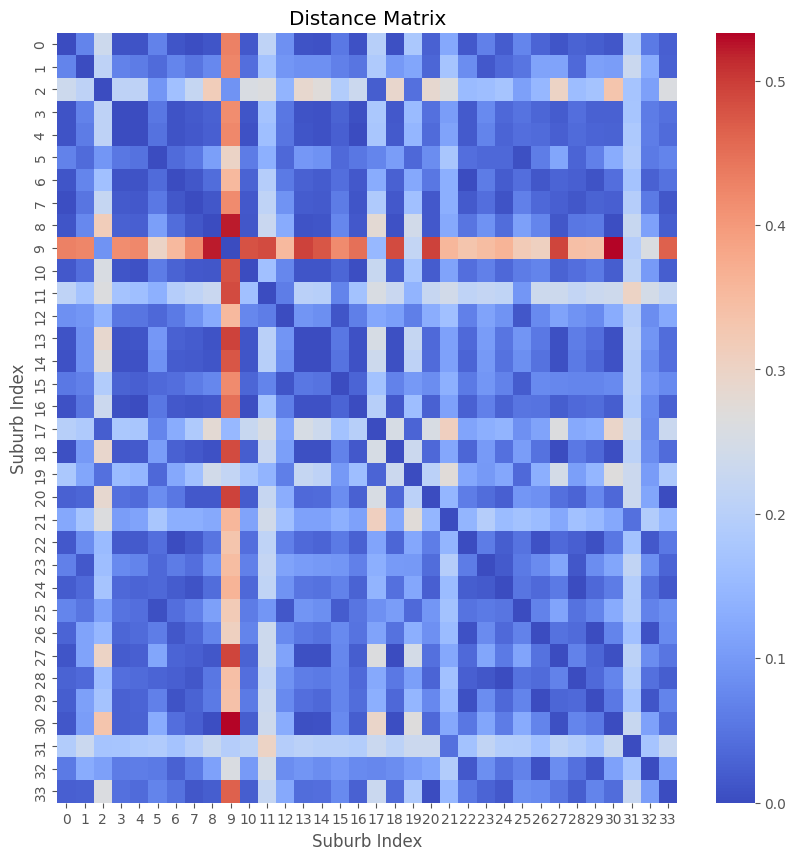

In [20]:
# compute the distance matrix in terms of Jensen-Shannon Divergence
distance_land_frac = np.zeros((data_land_frac.shape[0], data_land_frac.shape[0]))
for i in range(data_land_frac.shape[0]):
	for j in range(data_land_frac.shape[0]):
		distance_land_frac[i, j] = distance_JS(i, j)


print(distance_land_frac)
# plot the distance matrix
plt.figure(figsize=(10, 10))
sns.heatmap(distance_land_frac, cmap='coolwarm')
plt.title('Distance Matrix')
plt.xlabel('Suburb Index')
plt.ylabel('Suburb Index')
plt.show()

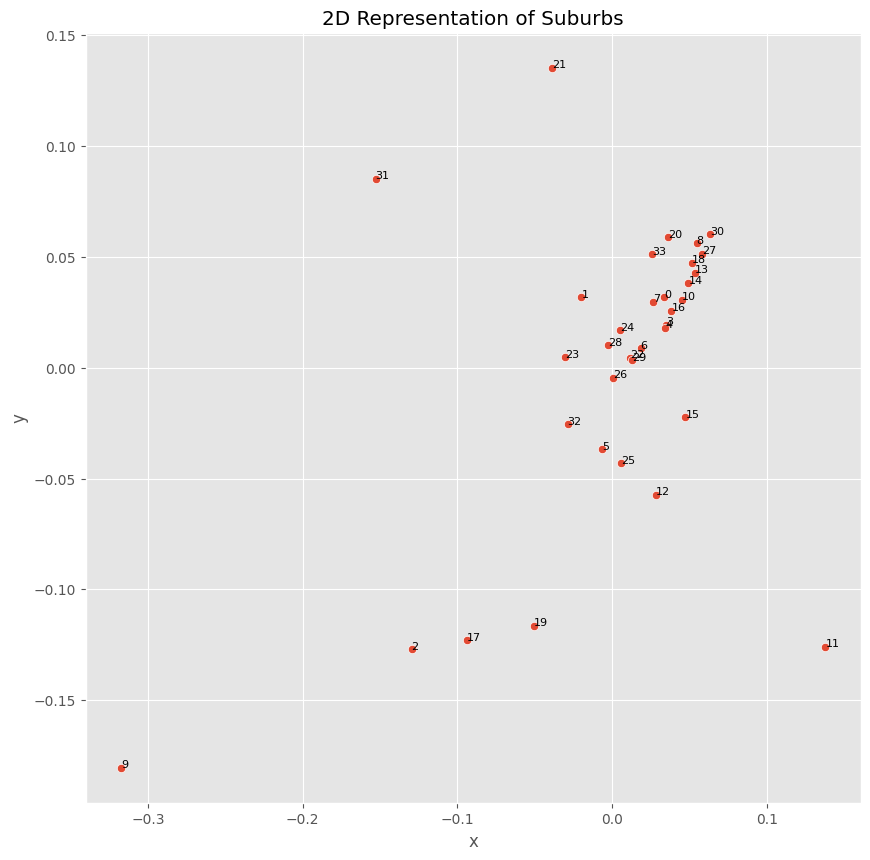

In [22]:
# do an MDS on the similarity matrix to get the 2D representation of the suburbs
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
suburb_2d = mds.fit_transform(distance_land_frac)

# plot the 2D representation of the suburbs
plt.figure(figsize=(10, 10))
sns.scatterplot(x=suburb_2d[:, 0], y=suburb_2d[:, 1])
plt.title('2D Representation of Suburbs')
plt.xlabel('x')
plt.ylabel('y')
# annotate the suburbs with the suburb index
for i in range(suburb_2d.shape[0]):
	plt.text(suburb_2d[i, 0], suburb_2d[i, 1], i, fontsize=8)
plt.show()


In [23]:
# Apply Procrustes analysis
mtx1, mtx2, disparity = procrustes(distance_land_frac, distance_original)
print(f"Procrustes Disparity: {disparity}")


Procrustes Disparity: 0.9132384466977748
